In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import cv2
import numpy as np
from silence_tensorflow import silence_tensorflow
silence_tensorflow()
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt

import configs as cfgs
from model import Model
from callbacks import LearningRateScheduler
from data_loader import data_loader, view_data

In [3]:
data = data_loader()

In [4]:
model = Model()

In [5]:
lr_scheduler = LearningRateScheduler()
tensorboard  = tf.keras.callbacks.TensorBoard(write_graph=False, update_freq=1)

In [ ]:
model.fit_generator(
    data,
    steps_per_epoch = cfgs.MAX_ITERATION//cfgs.MAX_EPOCH,
    epochs = cfgs.MAX_EPOCH,
    callbacks = [lr_scheduler, tensorboard]
)

Epoch 1/20
1639/2500 [==================>...........] - ETA: 7:56 - loss: 0.2098 - classification_loss: 0.0756 - regression_loss: 0.1342

In [32]:
for sample in data.take(11):
    img = np.uint8(sample[0][0]*cfgs.PIXEL_STD+cfgs.PIXEL_MEAN)
    true_classes = sample[1]['classification'][0]
    true_regress = sample[1]['regression'][0]

In [33]:
classes, regress = model.predict(sample[0])
pred_classes = np.where(classes[0]>0.3, 1, 0)
pred_regress = regress[0]

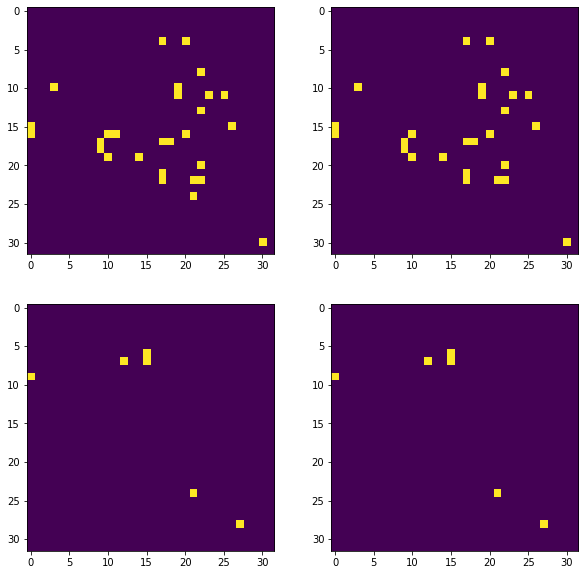

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(pred_classes[...,0])

plt.subplot(222)
plt.imshow(true_classes[...,0])

plt.subplot(223)
plt.imshow(pred_classes[...,1])

plt.subplot(224)
plt.imshow(true_classes[...,1])

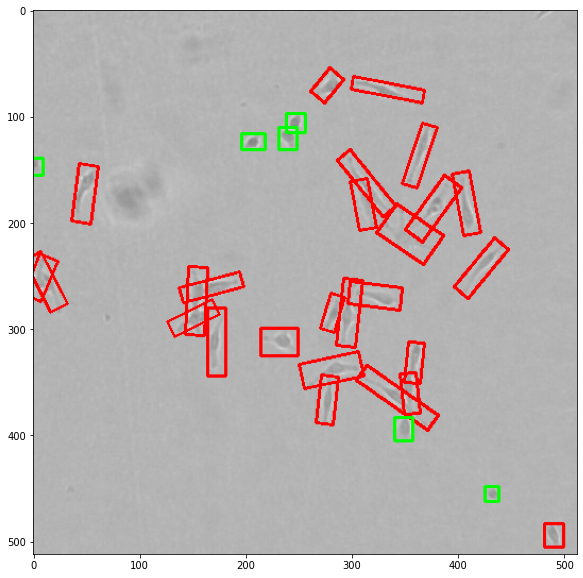

In [35]:
view_data(img, true_classes.numpy(), true_regress.numpy())

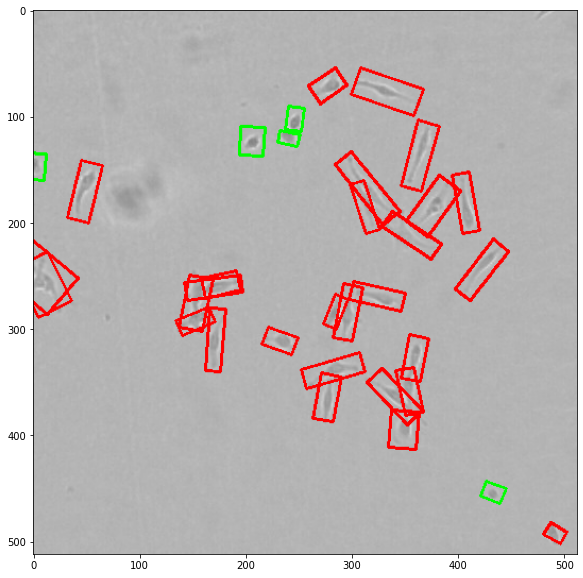

In [36]:
view_data(img, pred_classes, pred_regress)